# The lifecycle outlines the major stages that projects typically execute. There are six stages to build a model


Business Understanding 

Data Understanding

Data Preparation

Evaluation

Modeling 

Deployment


In [1]:
#Now I am Going to import nessesary module 

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
from sklearn import tree
from sklearn import metrics


In [50]:
cale_data=pd.read_csv("calendar.csv")
list_data=pd.read_csv("listings.csv")
revi_data=pd.read_csv("reviews.csv")

In [51]:
#Look at the head of calendar datasets
cale_data.head(20)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [52]:
#find missing values in calendar dataset
cale_data.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [53]:
#to find % missing values in each columns
cale_data.isnull().sum()/cale_data.isnull().shape[0]

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

In [54]:
cale_data.shape

(1393570, 4)

In [55]:
# cale_data.describe()

# Q1.My First Question is that how the price varies with the Date


Not only available days are stored in data, it seems to be stored not available days.

If the available values are f, the price values seems to be NaN.

The price values are stored as object, not integer. 
This is caused the value stored like $xx.xx, and it is necessary to transform this column.

In [56]:
# Now Start to cleaning the calender datasets
def transformation(df):
    '''input:That has to be clean
    i am writing this function to convert the date object to data and converts the price 
    columns object to flot vlaues
    output: will be a clean dataframe'''
    df.dropna(inplace=True)
    df['date']=pd.to_datetime(df['date'])
    
    df['price']=df['price'].str.replace('$','')
    df['price']=df['price'].str.replace(",",'')
    df['price']=df['price'].astype(float)
    return df

In [57]:
transformation(cale_data)

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0
...,...,...,...,...
1393207,10208623,2016-01-06,t,87.0
1393208,10208623,2016-01-07,t,87.0
1393211,10208623,2016-01-10,t,87.0
1393212,10208623,2016-01-11,t,87.0


In [58]:
#let's aggrigate price based on the date for analys this question
cale_data=cale_data.groupby("date")['price'].mean().reset_index()
cale_data

,date,price
0,2016-01-04,122.085879
1,2016-01-05,120.681307
2,2016-01-06,120.928258
3,2016-01-07,120.958896
4,2016-01-08,127.640853
...,...,...
360,2016-12-29,138.045503
361,2016-12-30,144.738380
362,2016-12-31,145.698146
363,2017-01-01,138.126968


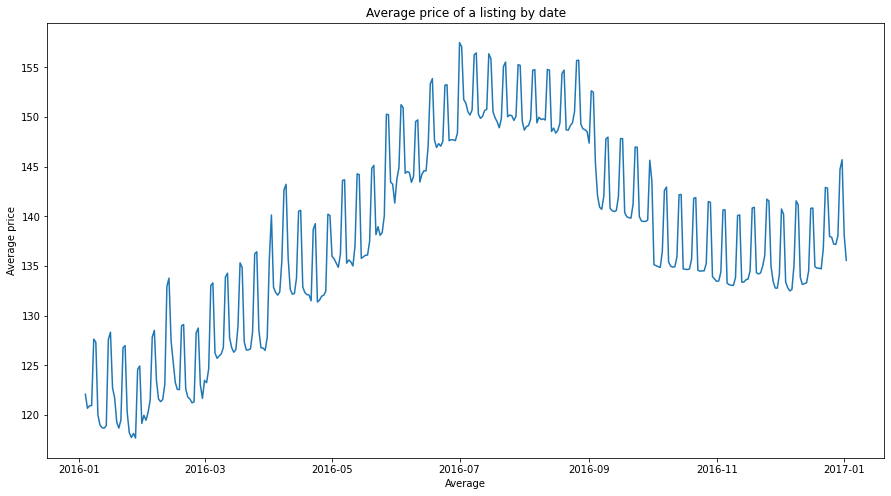

In [59]:
#lets see how the price very over a period of time by plotting a line chart
plt.figure(figsize=(15,8))
plt.plot(cale_data['date'],cale_data['price'])
plt.title("Average price of a listing by date")
plt.xlabel("Average")
plt.ylabel("Average price")
plt.show()

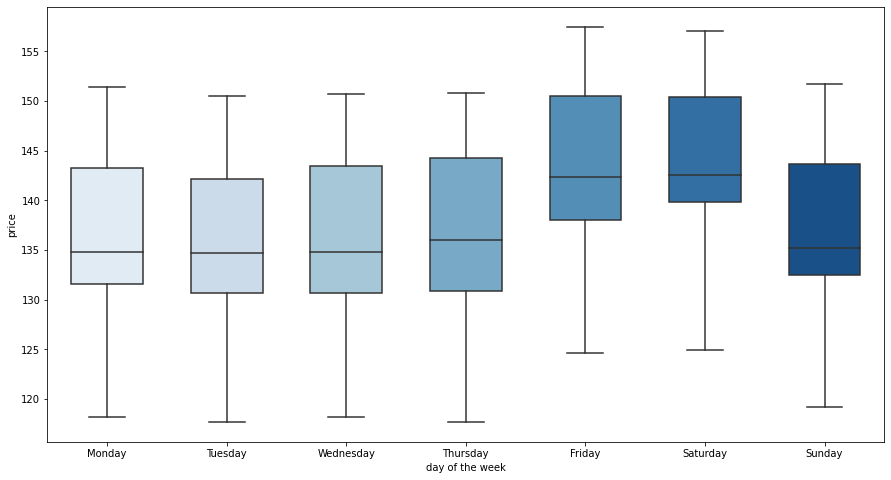

In [60]:
#for the same let's try to take  out the weekdays name from the data and the plot the price chart the weekdays
cale_data["day of the week"]=cale_data["date"].dt.day_name()
plt.figure(figsize=(15,8))
sns.boxplot(x='day of the week', y='price',data=cale_data ,palette="Blues", width=0.6)
plt.show()

Now we can understand that From the above visualisation,we figured out that the prices of 
the listings were maximum from July to September and were minimum from January to March

In [61]:
#Now we are going to analys listing dataset
#fistly look at the head of the data
list_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


# Q2. find Outliars in Datasets 

In [62]:
#Now find the missing values in the listing dataset
list_data.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [63]:
# if I want to see the % missing values in each column, i have use below line
list_data.isnull().sum()/list_data.isnull().shape[0]

id                                  0.000000
listing_url                         0.000000
scrape_id                           0.000000
last_scraped                        0.000000
name                                0.000000
                                      ...   
cancellation_policy                 0.000000
require_guest_profile_picture       0.000000
require_guest_phone_verification    0.000000
calculated_host_listings_count      0.000000
reviews_per_month                   0.164222
Length: 92, dtype: float64

In [64]:
#The Shape of listing data or no of rows and column in Listing 
list_data.shape

(3818, 92)

In [65]:
#look at the number of id and row in the table
print("Num of listings: ", list_data.id.count())
print("Num of rows: ", list_data.shape[0])

Num of listings:  3818
Num of rows:  3818


From the above statement we can see that every row represents uniqe listings

In [66]:
#now describe the data with 8 most important operations
list_data['review_scores_rating'].describe().reset_index()

,index,review_scores_rating
0,count,3171.000000
1,mean,94.539262
2,std,6.606083
3,min,20.000000
4,25%,93.000000
5,50%,96.000000
6,75%,99.000000
7,max,100.000000


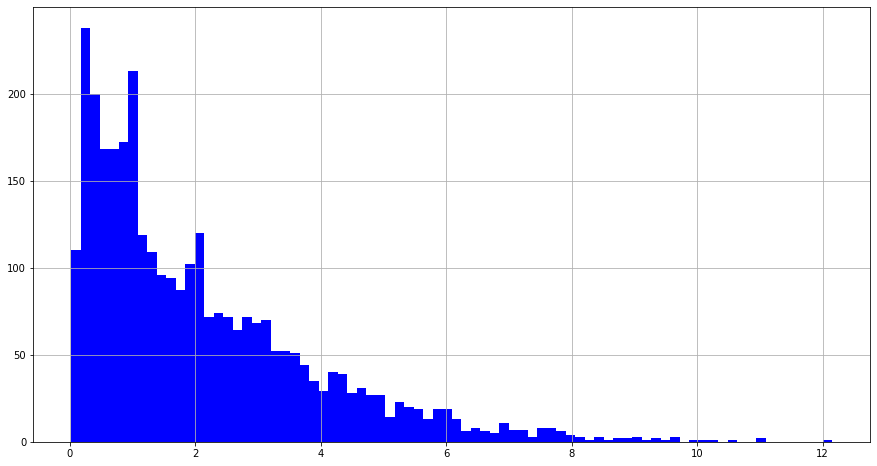

In [67]:
#Lets see review_per_month
plt.figure(figsize=(15,8))
plt.hist(list_data['reviews_per_month'].dropna().values,bins=80,color='b')
plt.grid()

from the above figure we did see the review per month

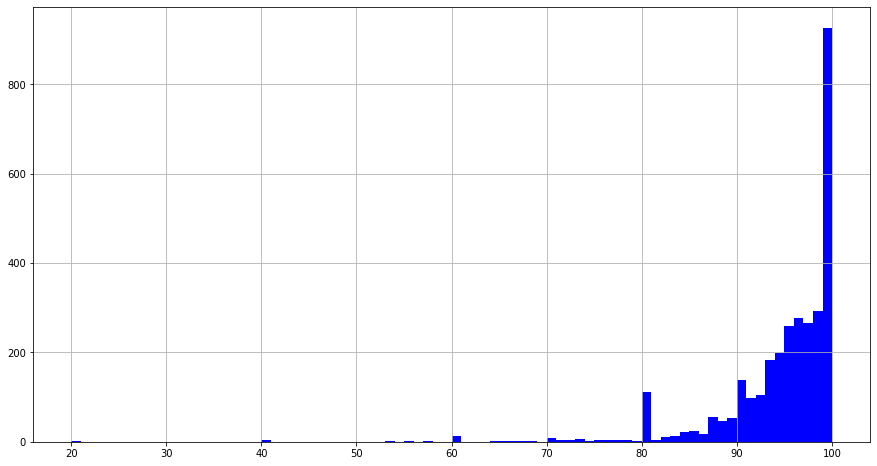

In [68]:
#lets see the histogram of review_scores_rating
plt.figure(figsize=(15,8))
plt.hist(list_data['review_scores_rating'].dropna().values,bins=80,color='b')
plt.grid()

This is very right skewed distribution.
The 75% or more values are 90 points. And the most common thing is 100 points.
I can say the low score listings are minolity.

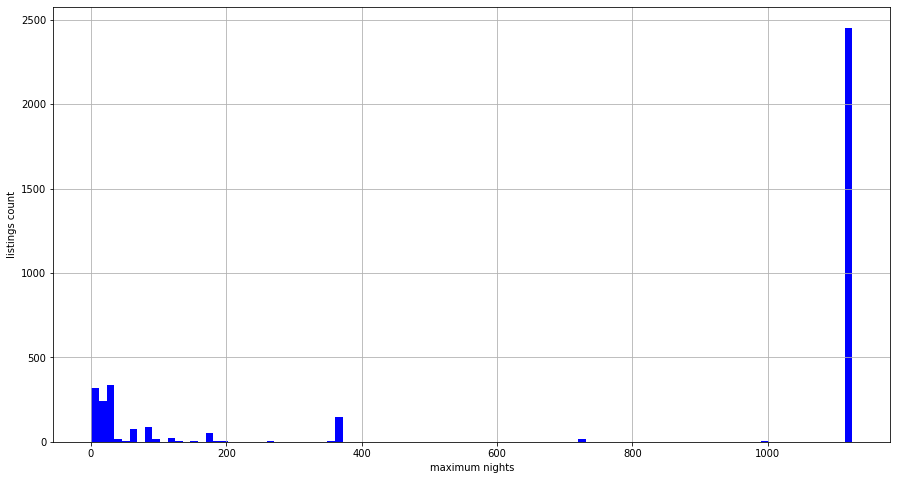

In [69]:
#now we are going to estemate outliers becouse values are very large
list_data = list_data[list_data['maximum_nights'] <= 1500]

plt.figure(figsize=(15, 8))
plt.hist(list_data.maximum_nights, bins=100, color='b')
plt.xlabel('maximum nights')
plt.ylabel('listings count')
plt.grid()

This was shown when investigating listing data. There were two groups in listings. It's a listing available at spots with a maximum nights less than a week and a listing of a sense of renting available for up to three years.

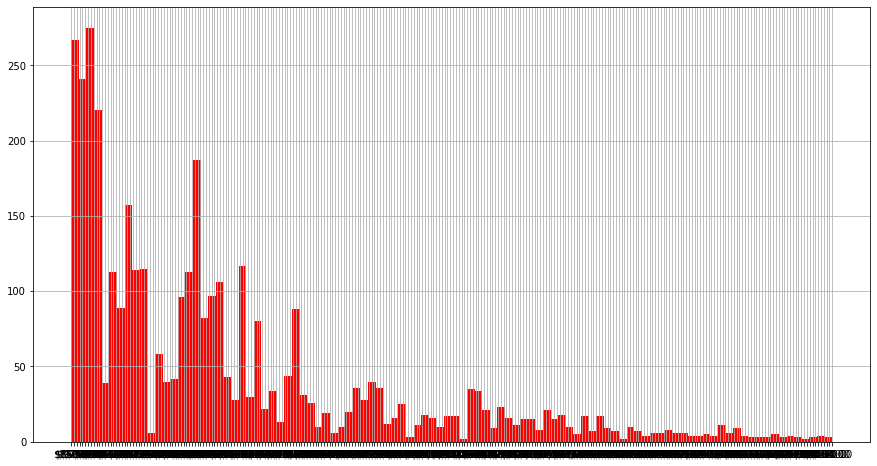

In [70]:
plt.figure(figsize=(15, 8))
plt.hist(list_data.price, bins=100, color='r')
plt.grid()

This is long tail distribution.
Almost values are from 0 to 200.

# Q3.How long is the period available for lending by rooms

In [71]:
revi_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [72]:
revi_data.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [73]:
revi_data.isnull().sum()/revi_data.isnull().shape[0]

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.000212
dtype: float64

In [74]:
revi_data.shape

(84849, 6)

In [75]:
list_data.head()
list_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [76]:
def clean_data(df):
    """
    Input: the dataframe that has to be cleaned
    This function treats the missing values and treats the column suitably
    Output:A clean dataframe
    
    """
    
    df=df.copy()
    df=df.loc[:,['host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','neighbourhood_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','cancellation_policy']]
  

    #Lets remove the % sign from the host_response_rate and host_acceptance_rate columns
    df['host_response_rate']=df['host_response_rate'].str.replace('%','')
    df['host_acceptance_rate']=df['host_acceptance_rate'].str.replace('%','')
    
    
    #Converting host_response_rate and host_acceptance rate to float type
    df['host_response_rate']=df['host_response_rate'].astype('float64')/100
    df['host_acceptance_rate']=df['host_acceptance_rate'].astype('float64')/100
   

    #Filling the missing values with 0
    df['host_response_rate'].fillna(0,inplace=True)
    df['host_acceptance_rate'].fillna(0,inplace=True)
    
    
    #Converting the columns with binomial values 
    #Let us  replace f with 0 and t with 1 in host_is_superhost column
    df['host_is_superhost']=df['host_is_superhost'].str.replace('f','0')
    df['host_is_superhost']=df['host_is_superhost'].str.replace('t','1')
    df['instant_bookable']=df['instant_bookable'].str.replace('f','0')
    df['instant_bookable']=df['instant_bookable'].str.replace('t','1')
    
    
    #Converting these two coumns as well to float and converting it from percentage to number
    df['host_is_superhost']=df['host_is_superhost'].astype('float64')
    df['instant_bookable']=df['instant_bookable'].astype('float64')
    
    
    #Filling the missing values with 0
    df['host_is_superhost'].fillna(0,inplace=True)
    df['instant_bookable'].fillna(0,inplace=True)
    
    
    #We can see that these all columns are strings and have $ sign.We need to remove the $ sign and convert the type to float
    df['price']=df['price'].str.replace('$','')
    df['weekly_price']=df['weekly_price'].str.replace('$','')
    df['monthly_price']=df['monthly_price'].str.replace('$','')
    df['security_deposit']=df['security_deposit'].str.replace('$','')
    df['cleaning_fee']=df['cleaning_fee'].str.replace('$','')
    df['extra_people']=df['extra_people'].str.replace('$','')
    
    
    #Also,removing the commas as well
    df['price']=df['price'].str.replace(',','')
    df['weekly_price']=df['weekly_price'].str.replace(',','')
    df['monthly_price']=df['monthly_price'].str.replace(',','')
    df['security_deposit']=df['security_deposit'].str.replace(',','')
    df['cleaning_fee']=df['cleaning_fee'].str.replace(',','')
    df['extra_people']=df['extra_people'].str.replace(',','')
    
    
    #Converting to float64
    df['price']=df['price'].astype('float64')
    df['weekly_price']=df['weekly_price'].astype('float64')
    df['monthly_price']=df['monthly_price'].astype('float64')
    df['security_deposit']=df['security_deposit'].astype('float64')
    df['cleaning_fee']=df['cleaning_fee'].astype('float64')
    df['extra_people']=df['extra_people'].astype('float64')
    
    #Replacing the missing values with 0
    df['price'].fillna(0,inplace=True)
    df['weekly_price'].fillna(0,inplace=True)
    df['monthly_price'].fillna(0,inplace=True)
    df['security_deposit'].fillna(0,inplace=True)
    df['cleaning_fee'].fillna(0,inplace=True)
    df['extra_people'].fillna(0,inplace=True)
    
    
    #Let us clean  the ameneties column
    df['amenities']=df['amenities'].str.replace("{","")
    df['amenities']=df['amenities'].str.replace("}","")
    df['amenities']=df['amenities'].str.replace(" ","")
    df['amenities']=df['amenities'].str.replace('"','')
    df['amenities']=df['amenities'].str.replace(",","  ")
    df['amenities']
    df['amenities_length']=df['amenities'].str.len()
    df=df.drop(['amenities'],axis=1)
    
    
    #Converting these categories to integer values
    df['host_response_time'].replace('within an hour',1, inplace=True)
    df['host_response_time'].replace('within a few hours',2,inplace=True)
    df['host_response_time'].replace('within a day',3,inplace=True)
    df['host_response_time'].replace('a few days or more',4,inplace=True)
    
    
    #Filling the missing values of this column as well
    df['host_response_time'].fillna(method='ffill',inplace=True)
    
    
    #Let us also treat missing values of some other columns
    df['beds'].fillna(method='ffill',inplace=True)
    df['bathrooms'].fillna(method='ffill',inplace=True)
    df['bedrooms'].fillna(method='ffill',inplace=True)
    return df

In [77]:
listing_ratings=clean_data(list_data)
listing_ratings

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,amenities_length
0,2.0,0.96,1.0,0.0,West Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0.0,moderate,109
1,1.0,0.98,1.0,1.0,West Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,strict,225
2,2.0,0.67,1.0,0.0,West Queen Anne,House,Entire home/apt,11,4.5,5.0,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,strict,270
3,2.0,0.00,0.0,0.0,West Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,flexible,186
4,1.0,1.00,0.0,0.0,West Queen Anne,House,Entire home/apt,6,2.0,3.0,...,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0.0,strict,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,2.0,0.99,1.0,0.0,Fremont,House,Entire home/apt,6,2.0,3.0,...,80.0,8.0,10.0,4.0,8.0,10.0,8.0,0.0,strict,208
3814,1.0,1.00,1.0,0.0,Portage Bay,Apartment,Entire home/apt,4,1.0,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,moderate,222
3815,1.0,0.00,0.0,0.0,Rainier Beach,House,Entire home/apt,2,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,moderate,253
3816,1.0,1.00,0.0,0.0,Madison Park,Condominium,Entire home/apt,2,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,moderate,153


In [78]:
listing_ratings['property_type'].unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent', nan],
      dtype=object)

In [79]:
def assign1(val):
    if val in ['House', 'Cabin', 'Condominium','Loft', 'Boat','Tent']:
        return val
    else:
        return 'other';
listing_ratings['property_type']=listing_ratings['property_type'].apply(assign1)

In [80]:
def assign2(val):
    if val in ['red bed']:
        return val
    return 'other'
listing_ratings['property_type']=listing_ratings['property_type'].apply(assign2)

In [81]:
print("sample 1: ", revi_data.comments.values[0], "\n")
print("sample 2: ", revi_data.comments.values[3])

sample 1:  Cute and cozy place. Perfect location to everything!  

sample 2:  Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to. 


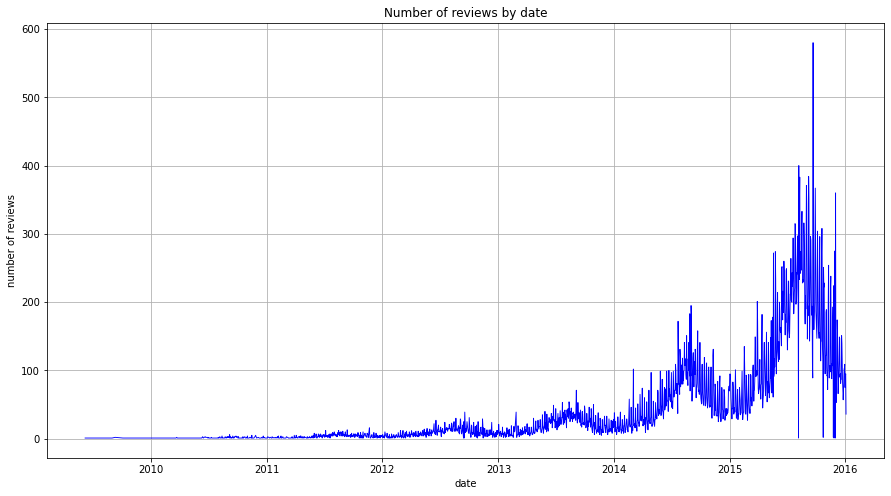

In [82]:
# convert date column's data type to date from object
review_df= revi_data.copy(deep=True)
review_df.date = pd.to_datetime(review_df.date)

review_df = review_df.groupby('date')['id'].count().reset_index()

# plot avg listings prices over time.
plt.figure(figsize=(15, 8))
plt.plot(review_df.date, review_df.id, color='b', linewidth=0.9)
plt.title("Number of reviews by date")
plt.xlabel('date')
plt.ylabel('number of reviews')
plt.grid()

It is little noisy, but we can see an increase in the number of Airbnb users. (and the date range is wide than calendar data)
And I realize it seems to have a peak at about the same time of each year.
So, let's use moving averages to smooth the graph.

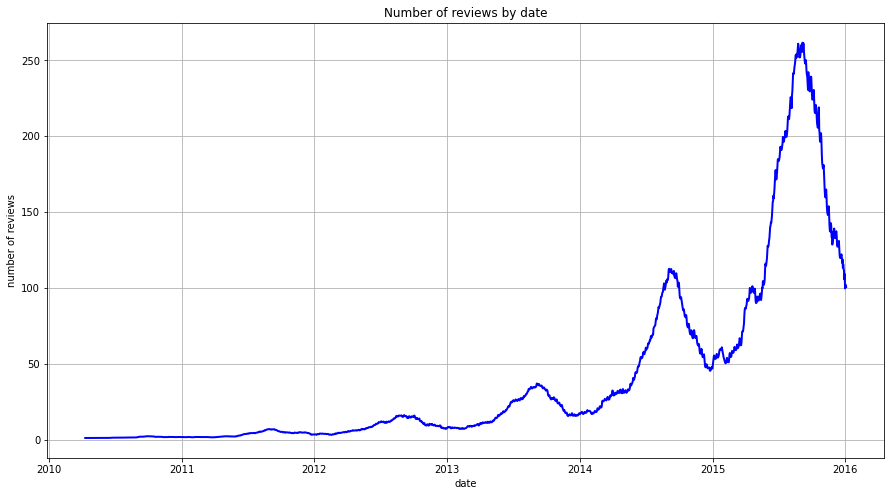

In [83]:
# create rolling mean column
review_df["rolling_mean_30"] = review_df.id.rolling(window=30).mean()

# plot avg listings prices over time.
plt.figure(figsize=(15, 8))
plt.plot(review_df.date, review_df.rolling_mean_30, color='b', linewidth=2.0)
plt.title("Number of reviews by date")
plt.xlabel('date')
plt.ylabel('number of reviews')
plt.grid()

I tried thirty days (about 1 month) window.
The graph became smooth and the trend became clear, and my belief that the peaks were in the same place became stronger.

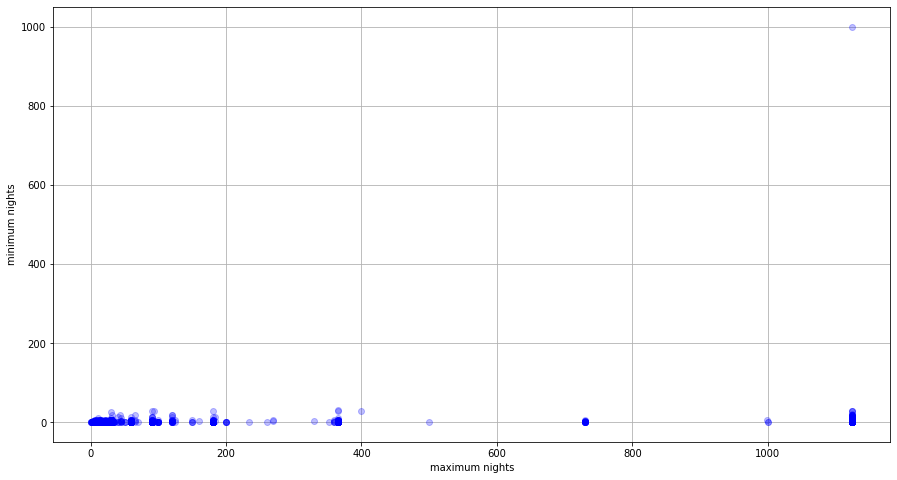

In [84]:
#For a further discussion, plot a scatter plot of maximum nights and minimum nights.
list_data["min_max_night_diff"] = list_data.maximum_nights - list_data.minimum_nights

plt.figure(figsize=(15, 8))
plt.plot(list_data.maximum_nights, list_data.minimum_nights, color='b', marker='o', linewidth=0, alpha=0.25)
plt.xlabel('maximum nights')
plt.ylabel('minimum nights')
plt.grid()

From here, it can be seen that the minimum nights is almost constant regardless of the maximum nights. In other words, it can be seen that listings with a long maximum nights are not rented exclusively for rental, but are widely handled from spot use to long-term stay.

# Conclusion

The prices of the listings are maximum from July to September and are minimum from January to March which is understood as July to September is the best time to visit Seattle because of the nice weather and therefore the prices are highest during that time because of the high demand.
The average rating score of Arbor Heights is maximum followed by Riverview and Southeast Magnolia.The ratings of a listing is influenced by whether a host is a superhost or not,the host’s response rate,the size of the listings,the number of amenities provided in the listing and also on its price.
Price of a listing depends on its neighborhood,size(number of bedrooms,number of bathrooms),type of the property i.e. if it is a bungalow,the price is higher than the other property and on whether the host is a superhost or not.